#### SVM (Support Vector Machine) in Python - Machine Learning From Scratch 07 - Python Tutorial

Note that Screen shots and most of material from this video - so thanks to the creator "Python Engineer" for all this!!

https://www.youtube.com/watch?v=UX0f9BNBcsY

<img src="images/svm.png">

- Follows linear model and tries to find linear decision boundary
- This boundary is called hyperplane, that best separates the two classes . so that distance betwen nearest datapoints is maximized

Blue => Class +1

Green => Class -1


#### Linear Model


Separating line : $w \cdot x - b = 0$


$w \cdot x - b \ge 1$ for $y_i =  +1$

$w \cdot x - b \le -1$ for $y_i =  -1$


#### I am trying to recall my Twelth Class:

Recall plane of equations:

If x,y,z be points on a plane with is at distance d from the origin, and direction cosines of the normal unit vector be a,b,c (so $\sqrt{a^2 + b^2 + c^2} = 1$) , then

ax + by +cz = d 

Above can be drivied from the fact that any position vector from origin to point on place has same component $=d$ on the normal vector and value is distance $d$.

That is why we write in vector form as $w \cdot x - b = 0$, where w is direction  vector of normal to plane.  On normalizing it to direction cosines, we have $ \frac{w}{\|w\|} \cdot x - \frac{b}{\|w\|} = 0 $ 

Now $\frac{b}{\|w\|}$ is distance from origin and $ \frac{w}{\|w\|} $ is the $\hat n$ vector. Indeed we already know $\hat n \cdot x = d $ where $d$ is perpendicular distance for plane from origin.


#### Coming back to Linear model

Separating line : $w \cdot x - b = 0$

We want:

$w \cdot x - b \ge 1$ for $y_i =  +1$

$w \cdot x - b \le -1$ for $y_i =  -1$

Above is equivalent saying perpidicular distance of class +1 space points to be more than plane's distance from origin so that point is on other side of seperating place. We could have done $w \cdot x \ge b $, but to **force extra separation** we want $w \cdot x \ge b + 1$, ie $w \cdot x - b \ge 1$   

we can commbine into one as:

$y_i ( w \cdot x - b) \ge 1$

#### Cost Function

##### Hinge Loss

$ l = max(0, 1 - y_i (w \cdot x_i - b))$

Above function penalizes mistakes heavily. 
<img src="images/svm_cost_andrew_ng.png">

(Above from andrew ng's coursera slides)


$$ l = max(0, 1 - y_i (w \cdot x_i - b))$$

$$
\begin{equation}
l =
\begin{cases}
  0, & \text{if }
       \begin{aligned}[t]
       y \cdot f(x) & >= 0
       \end{aligned}
\\
  1 - y \cdot f(x), & \text{otherwise}
\end{cases}
\end{equation}
$$


Additionally we can also simply interpret as let $wx_i -b = z$

$$
\begin{equation}
l =
\begin{cases}
  1-z , &
       \begin{aligned}[t]
        y & = +1
       \end{aligned}\\
  1 + z & \begin{aligned}[t]
        y & = -1
       \end{aligned}
\end{cases}
\end{equation}
$$



#### ADD Regularization

$$
\begin{align}
J = \lambda {\lVert}w{\rVert}^2 + (1/n) \sum_{i=1}^n max(0, 1 - y_i (w \cdot x_i - b)) 
\end{align}
$$

if $ y_i \cdot f(x) \ge 1$ :
$$
\begin{align}
J_i = \lambda {\lVert}w{\rVert}^2 
\end{align}
$$
else :
$$
\begin{align}
J_i = \lambda {\lVert}w{\rVert}^2  + 1 -  y_i(w.x_i - b)
\end{align}
$$


#### Gradients

if $y_i \cdot f(x_i) >= 1$:

$
\begin{align}
\frac{\partial J_i}{\partial w_K} &= 2 \lambda w_k \\
\frac{\partial J_i}{\partial b} &= 0
\end{align}
$


else:

$
\begin{align}
\frac{\partial J_i}{\partial w_K} &= 2 \lambda w_k - y_i x_i \\
\frac{\partial J_i}{\partial b} &= y_i
\end{align}
$

**Shouldn't it be ??**
$
\begin{align}
\frac{\partial J_i}{\partial w_K} &= 2 \lambda w_k - y_i x_{ik} \\
\frac{\partial J_i}{\partial b} &= y_i
\end{align}
$



#### Update Rule

$w = w - \alpha \cdot dw$

$b = b - \alpha \cdot db$

In [10]:
import numpy as np

class SVM:
    def __init__(self, learning_rate = 0.0001, lambda_param = 0.01, n_iters = 1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        # sometimes y are in 0 and one
        y_ = np.where(y <= 0, -1, +1)
        n_samples, n_features = X.shape
        
        # intialize w and b
        self.w = np.zeros(n_features)
        self.b = 0.0
        
        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * ( np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w = self.w - self.lr * ( 2 * self.lambda_param * self.w)
                else:
                    self.w = self.w - self.lr * ( 2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b = self.b - self.lr * y_[idx] 
        pass
    
    
    def predict(self, X):
        linear_output  = np.dot(X, self.w) - b
        return np.sign(linear_output)

In [11]:
#### Let us test
from sklearn.model_selection import train_test_split
from sklearn import datasets

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_blobs(n_samples=50,
                           n_features=2,
                           centers=2,
                           cluster_std=1.05,random_state=40)
y = np.where(y==0, -1, 1)

In [12]:
clf = SVM()
clf.fit(X, y)

In [13]:
print(clf.w, clf.b)

[0.56830015 0.16476888] -0.059100000000000666


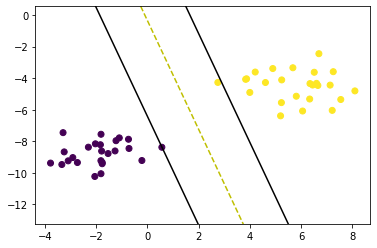

In [17]:
import matplotlib.pyplot as plt

def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2],[x1_1, x1_2], 'y--')
    ax.plot([x0_1, x0_2],[x1_1_m, x1_2_m], 'k')
    ax.plot([x0_1, x0_2],[x1_1_p, x1_2_p], 'k')

    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])

    plt.show()
    
visualize_svm()